In [1]:
!pip install opencv-python

import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

import tensorflow

from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from tensorflow.keras import callbacks
from tensorflow.keras.models import load_model

from joblib import dump, load

import re

You should consider upgrading via the '/home/adduser/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
# import model (labeled CT data)
model_labeledCT = load_model('../models/model_labeled_ct_15epochs')

In [3]:
data_path = '../raw_data/CT_data/Patient 777/CT/'

In [8]:
img=cv2.imdecode(np.fromfile('../raw_data/CT_data/Patient 1200/CT/IMG-0001-00001.jpg',dtype=np.uint8),cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img,(200,200))


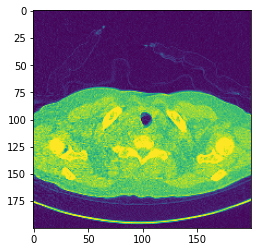

In [9]:
plt.imshow(img)

In [4]:
def read_ct_img_bydir(target_dir):
    img=cv2.imdecode(np.fromfile(target_dir,dtype=np.uint8),cv2.IMREAD_GRAYSCALE)
    #img = corp_margin(img)
    img=cv2.resize(img,(200,200))
    
    return img

In [5]:
# def get_data_paths(main_dir):
#     ct_paths = list()
#     patient_ids = list()
    
#     for dirs in os.listdir(main_dir):

#         target_dir = f'../raw_data/CT_data/{dirs}/'
#         sub_dir = os.listdir(target_dir)
#         target_dir = target_dir+sub_dir[0]+'/'

#         ct_paths.append(target_dir)
#         patient_ids.append(dirs)
        
#     return ct_paths

In [11]:
def get_patient_data(data_path):
    '''Loads raw data from image names of each class folder and assigns a label to it.'''
    
    target_dir=data_path

    target_list=[target_dir+file for file in os.listdir(target_dir)]

    X=np.array([read_ct_img_bydir(file) for file in target_list])[:,:,:,np.newaxis]

    return X

In [12]:
X = get_patient_data(data_path)

In [13]:
y_pred = model_labeledCT.predict(X)

In [14]:
y_pred

array([[1.21839257e-04, 7.91207612e-01, 2.08670557e-01],
       [9.90219653e-01, 1.76039009e-06, 9.77864023e-03],
       [9.90461409e-01, 9.29496251e-03, 2.43605697e-04],
       [7.28079763e-10, 9.99684215e-01, 3.15854908e-04],
       [1.29113232e-05, 9.99975562e-01, 1.15976327e-05],
       [9.89062890e-14, 9.99305367e-01, 6.94636430e-04],
       [2.42334419e-09, 9.99513984e-01, 4.86000063e-04],
       [2.12280171e-09, 9.75612164e-01, 2.43878607e-02],
       [2.35327455e-08, 9.99136150e-01, 8.63837427e-04],
       [5.26318607e-11, 9.99987006e-01, 1.29476366e-05],
       [9.99675393e-01, 8.99450754e-07, 3.23654240e-04],
       [6.25576104e-06, 9.99872446e-01, 1.21292083e-04],
       [6.65557400e-06, 9.99974728e-01, 1.85467397e-05],
       [9.99882579e-01, 5.41615418e-06, 1.12000635e-04],
       [1.15634173e-13, 9.99985218e-01, 1.47595456e-05],
       [7.41999240e-10, 9.99853492e-01, 1.46479884e-04],
       [9.99885678e-01, 2.09130358e-05, 9.34999553e-05],
       [9.98138070e-01, 5.90927

In [23]:
y_pred_class = np.rint(y_pred)
y_pred_class

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

In [24]:
classification = -999
    
ni = y_pred_class[:,0].sum()
pos = y_pred_class[:,1].sum()
neg = y_pred_class[:,2].sum()

if neg > pos:
    classification = 2 #negative
elif pos > neg:
    classification = 1 #positive

In [26]:
classification

1

In [ ]:
def classify_prediction(prediction):
    
    y_pred_class = np.rint(prediction)
    classification = -999
    
    ni = y_pred_class[:,0].sum()
    pos = y_pred_class[:,1].sum()
    neg = y_pred_class[:,2].sum()
    
    if neg > pos:
        classification = 2 #negative
    elif pos > neg:
        classification = 1 #positive
    
    return classification, ni, pos, neg

In [ ]:
predictions = pd.DataFrame()
predictions['patient_id']=''
predictions['prediction']=''
predictions['niCT_slices']=''
predictions['pCT_slices']=''
predictions['nCT_slices']=''

for path in ct_paths:
    X = get_patient_data(path)
    print(path)
    y_pred = model_labeledCT.predict(X)

    patient_id = get_patient_id(path)
    
    classification, ni, pos, neg = classify_prediction(y_pred)
    total_ct = int(ni) + int(pos) + int(neg)
    #df = df.append({'a':1, 'b':2}, ignore_index=True)
    predictions = predictions.append({'patient_id': patient_id, 'prediction': classification, 'niCT_slices': ni, 'pCT_slices': pos,'nCT_slices':neg, 'total_CT_slices': total_ct}, ignore_index = True)    